In [2]:
import sox
import mir_eval
import os
import json
import numpy as np
import glob
import shutil
import medleydb as mdb

In [2]:
cd ../deepsalience/

/scratch/rmb456/multif0/deepsalience


In [3]:
import compute_training_data as C
import glob
import os
import numpy as np

In [4]:
def compute_test_inputs(audio_files, test_dir):   
    for f in audio_files:
        print(f)
        prefix = os.path.basename(f).split('.')[0]
        save_path = os.path.join(test_dir, "{}_input.npy".format(prefix))
        if os.path.exists(save_path):
            print("   > already done!")
            continue

        hcqt = C.compute_hcqt(f)
        np.save(save_path, hcqt.astype(np.float32))
        print("   > done!")

# Melody Datasets

In [5]:
# MedleyDB Melody
mdb_mel_path = "../../multif0_ismir2017/multitask_test_data/medleydb_melody"

with open("../outputs/data_splits.json", 'r') as fhandle:
    splits = json.load(fhandle)
test_tracks = splits['test']

# copy relevant files from medleydb folder to this folder
for trackid in test_tracks:
    mtrack = mdb.MultiTrack(trackid)
    current_audio_path = mtrack.mix_path
    target_audio_path = os.path.join(mdb_mel_path, os.path.basename(current_audio_path))
    
    melody_file = mtrack.melody2_fpath
    target_mel_file = os.path.join(mdb_mel_path, os.path.basename(melody_file))
    if not os.path.exists(target_audio_path) and os.path.exists(melody_file):
        print(trackid)
        shutil.copyfile(current_audio_path, target_audio_path)
        if not os.path.exists(target_mel_file):
            shutil.copyfile(melody_file, target_mel_file)

# compute npy features
audio_files = glob.glob(os.path.join(mdb_mel_path, '*.wav'))
compute_test_inputs(audio_files, mdb_mel_path)

../../multif0_ismir2017/multitask_test_data/medleydb_melody/AClassicEducation_NightOwl_MIX.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/medleydb_melody/Auctioneer_OurFutureFaces_MIX.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/medleydb_melody/Phoenix_ColliersDaughter_MIX.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/medleydb_melody/MusicDelta_SwingJazz_MIX.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/medleydb_melody/MusicDelta_FusionJazz_MIX.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/medleydb_melody/ChrisJacoby_PigsFoot_MIX.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/medleydb_melody/Debussy_LenfantProdigue_MIX.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/medleydb_melody/MatthewEntwistle_FairerHopes_MIX.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/medleydb_melody/ChrisJacoby_BoothShotLincoln_MIX.wav
   > already

In [6]:
# Orchset
orchset_path = "../../multif0_ismir2017/multitask_test_data/orchset"
audio_files = glob.glob(os.path.join(orchset_path, '*.wav'))
compute_test_inputs(audio_files, orchset_path)

../../multif0_ismir2017/multitask_test_data/orchset/Haydn-S94-Andante-ex2.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/orchset/Beethoven-S9-II-ex2.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/orchset/Beethoven-S5-II-ex1.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/orchset/Ravel-Bolero-ex2.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/orchset/Dvorak-S9-IV-ex4.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/orchset/Musorgski-Ravel-PicturesExhibition-ex5.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/orchset/Musorgski-Ravel-PicturesExhibition-ex6.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/orchset/Tchaikovsky-SwanLake-Scene-ex2.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/orchset/Rimski-Korsakov-Scheherazade-YoungPrincePrincess-ex1.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/orchset/Profofiev-Romeo

In [7]:
# WJD - melody
wjd_mel_path = '../../multif0_ismir2017/multitask_test_data/weimar_jazz/melody/'
audio_files = glob.glob(os.path.join(wjd_mel_path, '*.wav'))
compute_test_inputs(audio_files, wjd_mel_path)

../../multif0_ismir2017/multitask_test_data/weimar_jazz/melody/JohnnyDodds_MuskratRamble_Solo.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/weimar_jazz/melody/NatAdderley_BohemiaAfterDark_Solo.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/weimar_jazz/melody/MichaelBrecker_NeverAlone_Solo.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/weimar_jazz/melody/CurtisFuller_DownUnder_Solo.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/weimar_jazz/melody/MilesDavis_KCBlues_Solo.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/weimar_jazz/melody/JoeLovano_Work_Solo.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/weimar_jazz/melody/HerbieHancock_Dolores_Solo.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/weimar_jazz/melody/JohnColtrane_MyFavoriteThings-2_Solo.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/weimar_jazz/melody/CurtisFuller_Blue

# Bass Dataset

In [8]:
# WJD - bass
wjd_bass_path = '../../multif0_ismir2017/multitask_test_data/weimar_jazz/bass/'
audio_files = glob.glob(os.path.join(wjd_bass_path, '*.wav'))
compute_test_inputs(audio_files, wjd_bass_path)

../../multif0_ismir2017/multitask_test_data/weimar_jazz/bass/DonByas_OutOfNowhere_Solo_bass.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/weimar_jazz/bass/FreddieHubbard_DownUnder_Solo_bass.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/weimar_jazz/bass/BenWebster_NightAndDay_Solo_bass.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/weimar_jazz/bass/CurtisFuller_BlueTrain_Solo_bass.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/weimar_jazz/bass/BobBerg_IDidntKnowWhatTimeItWas_Solo_bass.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/weimar_jazz/bass/JoshuaRedman_BluesOnSunday_Solo_bass.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/weimar_jazz/bass/JohnColtrane_MrPC_Solo_bass.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/weimar_jazz/bass/PaulDesmond_TheGirlFromEast9thStreet_Solo_bass.wav
   > already done!
../../multif0_ismir2017/multitask_test_dat

# Multif0 Datasets

In [9]:
# Bach10
bach10_path = '../../multif0_ismir2017/multitask_test_data/bach10'
audio_files = glob.glob(os.path.join(bach10_path, '*.wav'))
compute_test_inputs(audio_files, bach10_path)

../../multif0_ismir2017/multitask_test_data/bach10/04_ChristeDuBeistand.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/bach10/03_ChristederdubistTagundLicht.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/bach10/08_FuerDeinenThron.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/bach10/01_AchGottundHerr.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/bach10/10_NunBitten.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/bach10/02_AchLiebenChristen.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/bach10/06_DieSonne.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/bach10/07_HerrGott.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/bach10/09_Jesus.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/bach10/05_DieNacht.wav
   > already done!


In [10]:
# Su
su_path = '../../multif0_ismir2017/multitask_test_data/su'
audio_files = glob.glob(os.path.join(su_path, '*.wav'))
compute_test_inputs(audio_files, su_path)

../../multif0_ismir2017/multitask_test_data/su/PQ03_Farranc_audio.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/su/PQ02_Elgar_audio.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/su/PS02_Chopin_audio.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/su/SQ02_Janacek_audio.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/su/VS01_Schumann_audio.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/su/PS03_Mozart_audio.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/su/SQ01_Beethoven_audio.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/su/SQ03_Schubert_audio.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/su/VS04_Franck_audio.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/su/PS01_Beethoven_audio.wav
   > already done!


In [11]:
# MAPS
maps_path = '../../multif0_ismir2017/multitask_test_data/maps'
audio_files = glob.glob(os.path.join(maps_path, '*.wav'))
compute_test_inputs(audio_files, maps_path)

../../multif0_ismir2017/multitask_test_data/maps/MAPS_MUS-bk_xmas3_AkPnStgb.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/maps/MAPS_MUS-pathetique_1_SptkBGCl.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/maps/MAPS_MUS-schub_d960_3_AkPnStgb.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/maps/MAPS_MUS-mz_331_3_StbgTGd2.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/maps/MAPS_MUS-mz_333_3_ENSTDkCl.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/maps/MAPS_MUS-bk_xmas1_ENSTDkCl.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/maps/MAPS_MUS-br_im6_AkPnStgb.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/maps/MAPS_MUS-mz_331_2_StbgTGd2.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/maps/MAPS_MUS-mz_331_1_SptkBGCl.wav
   > already done!
../../multif0_ismir2017/multitask_test_data/maps/MAPS_MUS-liz_rhap02_AkPnCGdD.wav
   > already done!
..

In [30]:
import mir_eval
import csv
import matplotlib.pyplot as plt
%matplotlib inline

def time_freq_to_ragged_time_series(times, freqs):
    max_time = np.max(times)
    t_uniform = np.arange(0, max_time, 256./22050.)
    time_idx = np.digitize(times, t_uniform) - 1
    idx = time_idx < len(t_uniform)
    time_idx = time_idx[idx]
    
    freq_list = [[] for _ in t_uniform]
    for i, f in zip(time_idx, freqs):
        freq_list[i].append(f)
    
    freq_arrays = [np.array(lst) for lst in freq_list]
    return t_uniform, freq_arrays

maps_path = '../../multif0_ismir2017/multitask_test_data/maps/orig_txt_files/'
save_path = '../../multif0_ismir2017/multitask_test_data/maps'
txt_files = glob.glob(os.path.join(maps_path, '*.txt'))
step = 256./22050.
for txt_file in txt_files:
    intervals = []
    labels = []
    with open(txt_file, 'r') as fhandle:
        print(txt_file)
        reader = csv.reader(fhandle, delimiter='\t')
        first_line = True
        for line in reader:
            if first_line:
                first_line = False
                continue
            intervals.append([float(line[0]), float(line[1])])
            labels.append(int(line[2]))
    
    hz_labels = mir_eval.util.midi_to_hz(np.array(labels))
    times_list = []
    freqs_list = []
    for interval, hz_val in zip(intervals, hz_labels):
        interval_extended = np.arange(
            interval[0], interval[1] + step, step)
        labels_extended = hz_val * np.ones(interval_extended.shape)
        times_list.append(interval_extended)
        freqs_list.append(labels_extended)
    
    times = np.concatenate(times_list)
    freqs = np.concatenate(freqs_list)

    t_uniform, freq_arrays = time_freq_to_ragged_time_series(times, freqs)

    save_file = os.path.join(save_path, os.path.basename(txt_file))
    with open(save_file, 'w') as fhandle:
        writer = csv.writer(fhandle, delimiter='\t')
        for t, f_array in zip(t_uniform, freq_arrays):
            line = np.concatenate([np.array([t]), f_array]).tolist()
            writer.writerow(line)


../../multif0_ismir2017/multitask_test_data/maps/orig_txt_files/MAPS_MUS-chpn_op35_1_ENSTDkAm.txt
../../multif0_ismir2017/multitask_test_data/maps/orig_txt_files/MAPS_MUS-bach_846_SptkBGAm.txt
../../multif0_ismir2017/multitask_test_data/maps/orig_txt_files/MAPS_MUS-ty_mai_SptkBGAm.txt
../../multif0_ismir2017/multitask_test_data/maps/orig_txt_files/MAPS_MUS-mz_332_2_ENSTDkCl.txt
../../multif0_ismir2017/multitask_test_data/maps/orig_txt_files/MAPS_MUS-mz_333_2_StbgTGd2.txt
../../multif0_ismir2017/multitask_test_data/maps/orig_txt_files/MAPS_MUS-grieg_elfentanz_AkPnBsdf.txt
../../multif0_ismir2017/multitask_test_data/maps/orig_txt_files/MAPS_MUS-mos_op36_6_AkPnBsdf.txt
../../multif0_ismir2017/multitask_test_data/maps/orig_txt_files/MAPS_MUS-bk_xmas5_StbgTGd2.txt
../../multif0_ismir2017/multitask_test_data/maps/orig_txt_files/MAPS_MUS-schu_143_1_AkPnBcht.txt
../../multif0_ismir2017/multitask_test_data/maps/orig_txt_files/MAPS_MUS-chpn-p4_AkPnBcht.txt
../../multif0_ismir2017/multitask_test_

In [43]:
mdb_synth_txt_files = glob.glob(
    "../../multif0_ismir2017/multitask_test_data/medleydb_multif0/orig_text_files/*.txt")

for txt_file in mdb_synth_txt_files:
    print(txt_file)
    times, freqs = mir_eval.io.load_time_series(txt_file, delimiter='\t')
    t_uniform, freq_array = time_freq_to_ragged_time_series(times, freqs)

    save_file = os.path.join(
        "../../multif0_ismir2017/multitask_test_data/medleydb_multif0",
        os.path.basename(txt_file))

    with open(save_file, 'w') as fhandle:
        writer = csv.writer(fhandle, delimiter='\t')
        for t, f_array in zip(t_uniform, freq_array):
            f_array_nonzero = f_array[f_array > 0]
            line = np.concatenate([np.array([t]), f_array_nonzero]).tolist()
            writer.writerow(line)


../../multif0_ismir2017/multitask_test_data/medleydb_multif0/orig_text_files/MatthewEntwistle_TheFlaxenField_multif0_nosynth_annotation.txt
../../multif0_ismir2017/multitask_test_data/medleydb_multif0/orig_text_files/MatthewEntwistle_ImpressionsOfSaturn_multif0_nosynth_annotation.txt
../../multif0_ismir2017/multitask_test_data/medleydb_multif0/orig_text_files/MatthewEntwistle_TheArch_multif0_nosynth_annotation.txt
../../multif0_ismir2017/multitask_test_data/medleydb_multif0/orig_text_files/CelestialShore_DieForUs_multif0_nosynth_annotation.txt
../../multif0_ismir2017/multitask_test_data/medleydb_multif0/orig_text_files/MatthewEntwistle_FairerHopes_multif0_nosynth_annotation.txt
../../multif0_ismir2017/multitask_test_data/medleydb_multif0/orig_text_files/Grants_PunchDrunk_multif0_nosynth_annotation.txt
../../multif0_ismir2017/multitask_test_data/medleydb_multif0/orig_text_files/AClassicEducation_NightOwl_multif0_nosynth_annotation.txt
../../multif0_ismir2017/multitask_test_data/medleydb

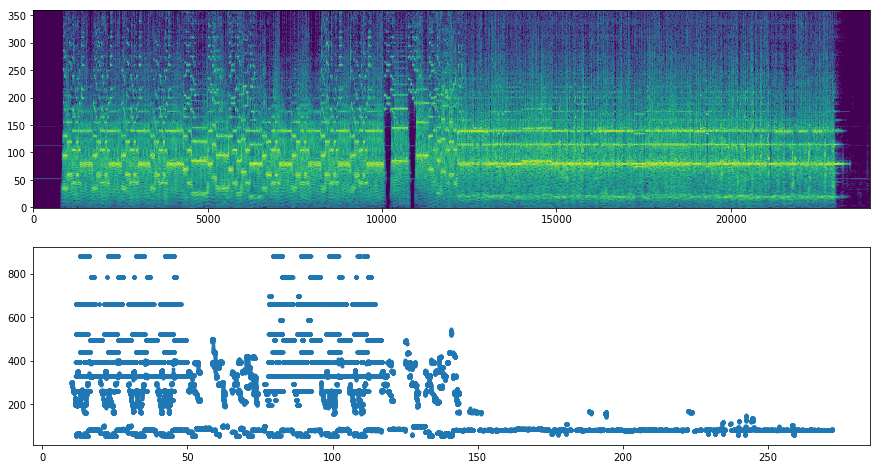

In [44]:
data_path = "../../multif0_ismir2017/multitask_test_data/medleydb_multif0/"
trackid = "CelestialShore_DieForUs"
X = np.load(
    os.path.join(data_path,
                 "{}_MIX_complete_nosynth_input.npy".format(trackid)))
times, freqs = mir_eval.io.load_ragged_time_series(
    os.path.join(data_path,
                 "{}_multif0_nosynth_annotation.txt".format(trackid)))
plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
plt.imshow(X[0], origin='lower')
plt.axis('auto')
plt.subplot(2, 1, 2)
texp = []
fexp = []
for t, flist in zip(times, freqs):
    for f in flist:
        if f > 0:
            texp.append(t)
            fexp.append(f)
plt.plot(texp, fexp, '.')
plt.show()


In [5]:
mir_eval.io.load_valued_intervals?

In [14]:
# MedleyDB Multif0 (Synth)
mdb_mf0_path = "../../multif0_ismir2017/multitask_test_data/medleydb_multif0"

with open("../outputs/data_splits.json", 'r') as fhandle:
    splits = json.load(fhandle)
test_tracks = splits['test']

# copy relevant files from medleydb synth to this folder
mdb_synth_folder = "/scratch/rmb456/multif0_ismir2017/multitask_data"
for trackid in test_tracks:

    current_audio_path = os.path.join(
        mdb_synth_folder, "{}_MIX_complete_nosynth.wav".format(trackid))
    target_audio_path = os.path.join(mdb_mf0_path, os.path.basename(current_audio_path))
    
    if not os.path.exists(current_audio_path):
        print("{} not found".format(current_audio_path))
        continue
    
    multif0_file = os.path.join(
        mdb_synth_folder, "{}_multif0_nosynth_annotation.txt".format(trackid))
    target_mf0_file = os.path.join(mdb_mf0_path, os.path.basename(multif0_file))
    
    if not os.path.exists(target_audio_path) and os.path.exists(multif0_file):
        print(trackid)
        shutil.copyfile(current_audio_path, target_audio_path)
        if not os.path.exists(target_mf0_file):
            shutil.copyfile(multif0_file, target_mf0_file)

# compute npy features
audio_files = glob.glob(os.path.join(mdb_mf0_path, '*.wav'))
compute_test_inputs(audio_files, mdb_mf0_path)

/scratch/rmb456/multif0_ismir2017/multitask_data/ChrisJacoby_BoothShotLincoln_MIX_complete_nosynth.wav not found
/scratch/rmb456/multif0_ismir2017/multitask_data/ChrisJacoby_PigsFoot_MIX_complete_nosynth.wav not found
/scratch/rmb456/multif0_ismir2017/multitask_data/Debussy_LenfantProdigue_MIX_complete_nosynth.wav not found
/scratch/rmb456/multif0_ismir2017/multitask_data/MatthewEntwistle_Lontano_MIX_complete_nosynth.wav not found
/scratch/rmb456/multif0_ismir2017/multitask_data/Mozart_DiesBildnis_MIX_complete_nosynth.wav not found
/scratch/rmb456/multif0_ismir2017/multitask_data/Phoenix_BrokenPledgeChicagoReel_MIX_complete_nosynth.wav not found
/scratch/rmb456/multif0_ismir2017/multitask_data/Phoenix_ColliersDaughter_MIX_complete_nosynth.wav not found
/scratch/rmb456/multif0_ismir2017/multitask_data/Phoenix_ElzicsFarewell_MIX_complete_nosynth.wav not found
/scratch/rmb456/multif0_ismir2017/multitask_data/Phoenix_LarkOnTheStrandDrummondCastle_MIX_complete_nosynth.wav not found
/scratch

# Vocal Datasets

In [13]:
# iKala
ikala_path = '../../multif0_ismir2017/multitask_test_data/ikala'
audio_files = glob.glob(os.path.join(ikala_path, '*.wav'))
compute_test_inputs(audio_files, ikala_path)

../../multif0_ismir2017/multitask_test_data/ikala/21038_chorus.wav
   > done!
../../multif0_ismir2017/multitask_test_data/ikala/71710_verse.wav
   > done!
../../multif0_ismir2017/multitask_test_data/ikala/54173_chorus.wav
   > done!
../../multif0_ismir2017/multitask_test_data/ikala/54247_verse.wav
   > done!
../../multif0_ismir2017/multitask_test_data/ikala/31115_chorus.wav
   > done!
../../multif0_ismir2017/multitask_test_data/ikala/45406_chorus.wav
   > done!
../../multif0_ismir2017/multitask_test_data/ikala/21083_chorus.wav
   > done!
../../multif0_ismir2017/multitask_test_data/ikala/66564_verse.wav
   > done!
../../multif0_ismir2017/multitask_test_data/ikala/21054_verse.wav
   > done!
../../multif0_ismir2017/multitask_test_data/ikala/45412_verse.wav
   > done!
../../multif0_ismir2017/multitask_test_data/ikala/45387_chorus.wav
   > done!
../../multif0_ismir2017/multitask_test_data/ikala/31118_chorus.wav
   > done!
../../multif0_ismir2017/multitask_test_data/ikala/54210_chorus.wav
  